# Pymaceuticals Inc.
---

### Analysis

- Based on the summary statistics In [6], it can be inferred that Naftisol has low efficacy in the treatment of SCC due to the mean tumor volume being equal to that of the Placebo drug.
- There is a strong positive correlation (r-value: 0.86) between weight (in grams) and tumor volume (mm3); the more weight a mouse has, the higher the volume of the tumor would be.
- Based on the boxplot and line plot, the drug of interest (capomulin) showed considerable efficacy in treating SCC. The final tumor volume was lower compared to its initial volume at Timepoint 0 for mice treated with the aforementioned drug.
 

In [1]:
# Checking the number of mice.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merge_df = pd.merge(study_results,mouse_metadata)
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
unique_df = merge_df.drop_duplicates(subset=['Mouse ID'])
duplicated = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicated['Mouse ID'].unique()

array(['g989'], dtype=object)

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_df = unique_df[unique_df['Mouse ID'] != 'g989']

In [5]:
# Checking the number of mice in the clean DataFrame.
filtered_df['Mouse ID'].count()
#This should be 248?

248

## Summary Statistics

In [6]:
mean_tumor_volume = merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
median_tumor_size = merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
var_tumor = merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
stdev_tumor = merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
sem_tumor = merge_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

summary_table = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,
                              "Median Tumor Volume":median_tumor_size,
                              "Tumor Volume Variance":var_tumor,
                              "Tumor Volume Std. Dev.":stdev_tumor,
                              "Tumor Volume Std. Err.":sem_tumor})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_summary = merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median', 'var', 'std', 
                                                                          lambda x: np.std(x, ddof=1) / np.sqrt(len(x))])
adv_summary

,mean,median,var,std,<lambda_0>
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

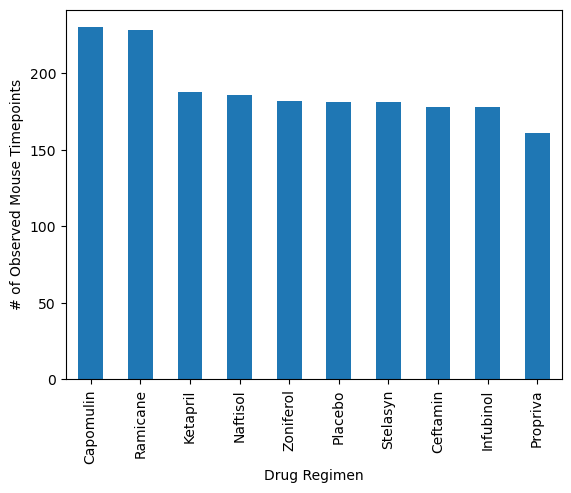

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
pandas_bar = merge_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

pandas_bar.plot(kind="bar", ylabel="# of Observed Mouse Timepoints");

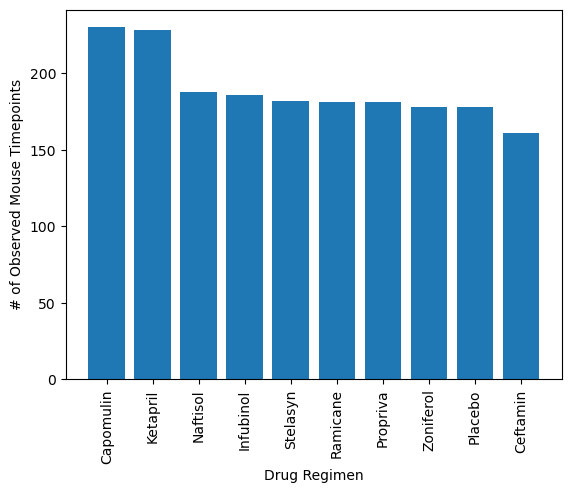

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoint_count = merge_df.groupby("Drug Regimen")["Timepoint"].size().sort_values(ascending=False)
x_axis = np.arange(len(timepoint_count))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, merge_df["Drug Regimen"].unique(), rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.bar(x_axis,timepoint_count, align='center');

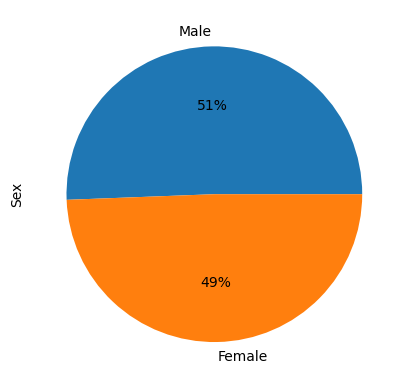

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pandas_pie = merge_df["Sex"].value_counts()

pandas_pie.plot(kind="pie", ylabel="Sex", autopct="%1.0f%%");

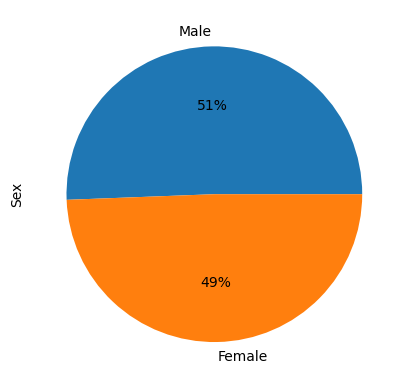

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
values = merge_df["Sex"].value_counts().tolist()

plt.ylabel("Sex")
plt.pie(values, labels=labels, autopct="%1.0f%%");

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
max_timepoint = merge_df.groupby("Mouse ID")["Timepoint"].max()
# Start by getting the last (greatest) timepoint for each mouse
final_tumor_volume_df = pd.merge(merge_df, max_timepoint, on=["Timepoint"], how="inner")
final_tumor_volume = final_tumor_volume_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_of_interest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# selected_drugs_count = selected_drugs_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].max()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = final_tumor_volume_df["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol_data.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == "Capomulin"]
ramicane_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == "Ramicane"]
infubinol_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == "Ceftamin"]
    
# add subset 
capomulin_subset = capomulin_df[["Tumor Volume (mm3)", "Drug Regimen"]]
ramicane_subset = ramicane_df[["Tumor Volume (mm3)", "Drug Regimen"]]
infubinol_subset = infubinol_df[["Tumor Volume (mm3)", "Drug Regimen"]]
ceftamin_subset = ceftamin_df[["Tumor Volume (mm3)", "Drug Regimen"]]
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

capomulin_outliers = capomulin_subset[(capomulin_subset['Tumor Volume (mm3)'] < lower_bound) | (capomulin_subset['Tumor Volume (mm3)'] > upper_bound)]
capomulin_outlier_volumes = capomulin_outliers['Tumor Volume (mm3)'].tolist()
ramicane_outliers = ramicane_subset[(ramicane_subset['Tumor Volume (mm3)'] < lower_bound) | (ramicane_subset['Tumor Volume (mm3)'] > upper_bound)]
ramicane_outlier_volumes = ramicane_outliers['Tumor Volume (mm3)'].tolist()
infubinol_outliers = infubinol_subset[(infubinol_subset['Tumor Volume (mm3)'] < lower_bound) | (infubinol_subset['Tumor Volume (mm3)'] > upper_bound)]
infubinol_outliers_volumes = infubinol_outliers['Tumor Volume (mm3)'].tolist()
ceftamin_outliers = ceftamin_subset[(ceftamin_subset['Tumor Volume (mm3)'] < lower_bound) | (ceftamin_subset['Tumor Volume (mm3)'] > upper_bound)]
ceftamin_outliers_volumes = ceftamin_outliers['Tumor Volume (mm3)'].tolist()

# print(f"Capomulin's potential outliers: {capomulin_outlier_volumes}")
# print(f"Ramicane's potential outliers: {ramicane_outlier_volumes}")
# print(f"Infubinol's potential outliers: {infubinol_outliers_volumes}")
# print(f"Ceftamin's potential outliers: {ceftamin_outliers_volumes}")

C:\Users\jvvil\AppData\Local\Temp\ipykernel_23584\864842093.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])


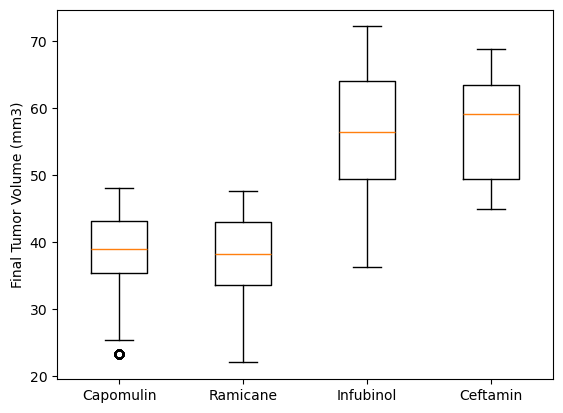

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [capomulin_subset["Tumor Volume (mm3)"], ramicane_subset['Tumor Volume (mm3)'], infubinol_subset['Tumor Volume (mm3)'], ceftamin_subset['Tumor Volume (mm3)']]
fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax.boxplot(data);

## Line and Scatter Plots

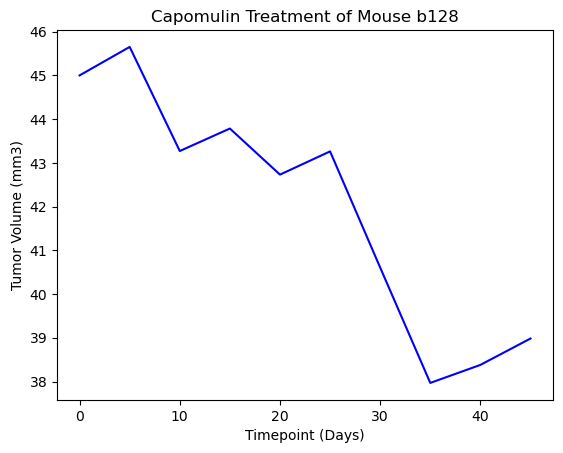

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
b128_data = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
timepoints = b128_data["Timepoint"]
b128_tumor = b128_data["Tumor Volume (mm3)"]

plt.plot(timepoints, b128_tumor, color='b')
plt.title("Capomulin Treatment of Mouse b128")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

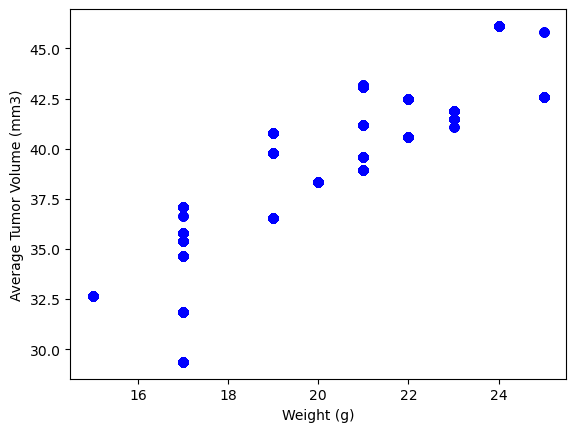

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
average_tumor_volume_df = pd.DataFrame(average_tumor_volume).reset_index()
average_tumor_volume_df.columns = ["Mouse ID", "Average Tumor Volume"]
merged_data = capomulin_df.merge(average_tumor_volume_df, on="Mouse ID")

(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_data["Weight (g)"],merged_data["Average Tumor Volume"])
regress_values = merged_data["Weight (g)"] * slope + intercept

plt.scatter(merged_data["Weight (g)"], merged_data["Average Tumor Volume"], color='b')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.86


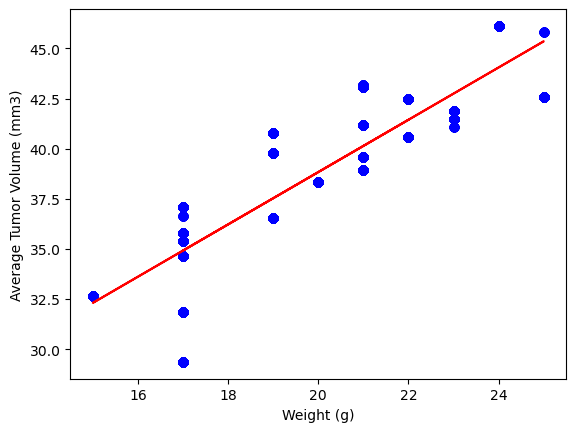

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.scatter(merged_data["Weight (g)"], merged_data["Average Tumor Volume"], color='b')
plt.plot(merged_data["Weight (g)"],regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
